# 자분특기말플젝 212STG25 이채영 코드파일

### 코랩 준비

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# 기본 라이브러리 import
import pandas as pd 
import numpy as np
from datetime import * 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import urllib.request

In [ ]:
# 경로 설정    
import os

os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

# PART1

### import

In [ ]:
# 모델링 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import mean_squared_error 
import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance, plot_tree
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.cm as cm

### 데이터 불러오기

In [ ]:
def load_data(datapath):
    data = pd.read_csv(datapath)
    print('Shape:', data.shape)
    display(data.sample(10))
    return data
    
    
data = load_data("OnlineNewsPopularity.csv")

In [ ]:
data=data.drop(['url',' timedelta'],axis=1)
data.target=data[' shares']
data.x=data.drop([' shares'],axis=1)

In [ ]:
# train, test 나누기
x_train, x_test, y_train, y_test=train_test_split(data.x, data.target, test_size=0.2, random_state=42)

#train을 다시 train과 validation set로 나누기
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train, test_size=0.2, random_state=42)

### linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_pred=lin_reg.predict(x_val)
lin_mse=mean_squared_error(y_pred,y_val)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

11230.644454147696

### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred=tree_reg.predict(x_val)
tree_mse=mean_squared_error(y_pred,y_val)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

19126.21973895826

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#parameter tuning

param_grid={"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tree_reg=DecisionTreeRegressor()

grid_search=RandomizedSearchCV(tree_reg,param_grid,cv=3,n_iter=50,random_state=42,scoring='neg_mean_squared_error',return_train_score=True,verbose=3)

grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9;, score=(train=-107969438.964, test=-195848664.826) total time=   0.1s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9;, score=(train=-125001240.237, test=-162689943.936) total time=   0.1s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9;, score=(train=-162770741.834, test=-83099235.896) total time=   0.0s
[CV 1/3] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=3;, score=(train=-106969085.073, test=-194925539.451) total time=   0.2s
[CV 2/3] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=3;, score=(train=-126529768.795, test=-163276753.544) total time=   0.2s
[CV 3/3] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=3;, score=(train=-154444024.802, test=-96973020.151) total time=   0.2s
[CV 1/3] END max

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=50,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
grid_search.best_params_

{'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': 90,
 'min_samples_leaf': 7}

In [ ]:
tree_reg=DecisionTreeRegressor(max_depth=3,max_features='sqrt',max_leaf_nodes=870,min_samples_leaf=8)
tree_reg.fit(x_train,y_train)

y_pred=tree_reg.predict(x_val)
tree_mse=mean_squared_error(y_pred,y_val)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

11312.662743614845

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(x_train,y_train)

y_pred=forest_reg.predict(x_val)
forest_mse=mean_squared_error(y_pred,y_val)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

- parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
forest_reg=RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = forest_reg, param_distributions = random_grid, cv=3,n_iter=15,random_state=42,scoring='neg_mean_squared_error',return_train_score=True,verbose=3)

rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=531;, score=(train=-46692419.203, test=-190145491.901) total time= 6.8min
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=531;, score=(train=-47679646.597, test=-163304951.649) total time= 6.7min
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=531;, score=(train=-66911027.961, test=-78933025.386) total time= 6.8min
[CV 1/3] END max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=(train=-71653608.858, test=-194300016.270) total time=   5.9s
[CV 2/3] END max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=(train=-85913132.430, test=-164938391.983) total time=   5.7s
[CV 3/3] END max_depth=19, max_features=auto, min_samples_leaf=4, 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [10, 14, 19, 24, 28, 33,
                                                      38, 43, 47, 52, 57, 62,
                                                      66, 71, 76, 81, 85, 90,
                                                      95, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 62, 114, 166, 218,
                                                         270, 322, 374, 426,
                                                         478, 531, 583, 635,
                                                         687, 739, 791, 843,
                                                         895, 947, 1000]},
                   ra

In [ ]:
rf_random.best_params_

{'max_depth': 76,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 531}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(max_depth= 76,max_features= 'sqrt',min_samples_leaf= 4,min_samples_split=10,n_estimators= 531)
forest_reg.fit(x_train,y_train)

y_pred=forest_reg.predict(x_val)
forest_mse=mean_squared_error(y_pred,y_val)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

11197.866855298356

### 엑스트라 트리

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

xtree_reg = ExtraTreesRegressor(max_depth= 76,max_features= 'sqrt',
                                min_samples_leaf= 4,min_samples_split=10,n_estimators= 531, random_state=42)
xtree_reg.fit(x_train, y_train)

y_pred=xtree_reg.predict(x_val)
xtree_mse=mean_squared_error(y_pred,y_val)
xtree_rmse=np.sqrt(xtree_mse)
xtree_rmse

11224.79488510362

### 다항회귀(2차)

In [ ]:
#2차
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly_train=poly_features.fit_transform(x_train)
x_poly_test=poly_features.fit_transform(x_test)
x_poly_val=poly_features.fit_transform(x_val)

lin_reg=LinearRegression()
lin_reg.fit(x_poly_train,y_train)
y_pred=lin_reg.predict(x_poly_val)
poly_mse=mean_squared_error(y_pred,y_val)
poly_rmse=np.sqrt(poly_mse)
poly_rmse

298440071.91752154

### 규제가 있는 선형모델

- ridge

In [ ]:
from sklearn.linear_model import SGDRegressor

ridge_reg=SGDRegressor(penalty='l2')
ridge_reg.fit(x_train,y_train)
y_pred=ridge_reg.predict(x_val)
ridge_mse=mean_squared_error(y_pred,y_val)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

2.4778496794387935e+19

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

grid_search = GridSearchCV(ridge_reg, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1]},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'alpha': 0.4}

In [ ]:
ridge_reg=SGDRegressor(penalty='l2',alpha=0.4)
ridge_reg.fit(x_train,y_train)
y_pred=ridge_reg.predict(x_val)
ridge_mse=mean_squared_error(y_pred,y_val)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

5.181458278145719e+19

- lasso

In [ ]:
lasso_reg=SGDRegressor(penalty='l1')
lasso_reg.fit(x_train,y_train)
y_pred=ridge_reg.predict(x_val)
lasso_mse=mean_squared_error(y_pred,y_val)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

4.8844313819096195e+19

In [ ]:
param_grid={'alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

grid_search = GridSearchCV(lasso_reg, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(penalty='l1'), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1]},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'alpha': 0.7}

In [ ]:
lasso_reg=SGDRegressor(penalty='l1',alpha=0.7)
lasso_reg.fit(x_train,y_train)
y_pred=ridge_reg.predict(x_val)
lasso_mse=mean_squared_error(y_pred,y_val)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

5.181458278145719e+19

### 앙상블: 투표기반 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
forest_reg=RandomForestRegressor(max_depth= 76,max_features= 'sqrt',min_samples_leaf= 4,min_samples_split=10,n_estimators= 531)
xtree_reg = ExtraTreesRegressor(max_depth= 76,max_features= 'sqrt',min_samples_leaf= 4,min_samples_split=10,n_estimators= 531, random_state=42)

voting_reg = VotingRegressor(estimators=[('rf',forest_reg),('lr',lin_reg),('xt',xtree_reg)])
voting_reg.fit(x_train,y_train)

for reg in (forest_reg, lin_reg,xtree_reg):
  reg.fit(x_train,y_train)
  y_pred=reg.predict(x_val)
  print(mean_squared_error(y_pred,y_val))

125352141.74536636
126127374.85547838
125996020.21264838


In [ ]:
print(np.sqrt(125268696.94656265))
print(np.sqrt(126127374.85547838))
print(np.sqrt(125996020.21264838))

11192.349929597567
11230.644454147696
11224.79488510362


In [ ]:
y_pred=voting_reg.predict(x_val)
voting_reg_mse=mean_squared_error(y_pred,y_val)
voting_reg_rmse=np.sqrt(voting_reg_mse)
voting_reg_rmse

11189.927011475174

- test data에서

In [ ]:
y_pred_test=voting_reg.predict(x_test)
voting_mse=mean_squared_error(y_pred_test,y_test)
voting_rmse=np.sqrt(voting_mse)
voting_rmse

10806.38978012193

### 앙상블: Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg=BaggingRegressor(DecisionTreeRegressor(max_depth=3,max_features='sqrt',max_leaf_nodes=870,min_samples_leaf=8),n_estimators=500,max_samples=100,bootstrap=True)
bag_reg.fit(x_train,y_train)

y_pred=bag_reg.predict(x_val)

In [ ]:
bag_reg_mse=mean_squared_error(y_pred,y_val)
bag_reg_rmse=np.sqrt(bag_reg_mse)
bag_reg_rmse

11243.660483673244

### 앙상블: Boosting

- 그레이디언트 부스팅

In [ ]:
###GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

gbrt_reg=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
gbrt_reg.fit(x_train,y_train)

y_pred=gbrt_reg.predict(x_val)

In [ ]:
gbrt_reg_mse=mean_squared_error(y_pred,y_val)
gbrt_reg_rmse=np.sqrt(gbrt_reg_mse)
gbrt_reg_rmse

11278.337733031063

- xgboost

In [ ]:
import xgboost
xgb_reg=xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train,eval_set=[(x_val,y_val)],early_stopping_rounds=2)
y_pred=xgb_reg.predict(x_val)


[10:58:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11714.1
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:11627.4
[2]	validation_0-rmse:11552
[3]	validation_0-rmse:11492.5
[4]	validation_0-rmse:11445.1
[5]	validation_0-rmse:11404.9
[6]	validation_0-rmse:11374.5
[7]	validation_0-rmse:11350.8
[8]	validation_0-rmse:11328.5
[9]	validation_0-rmse:11310.2
[10]	validation_0-rmse:11295.5
[11]	validation_0-rmse:11283.9
[12]	validation_0-rmse:11273.5
[13]	validation_0-rmse:11265.4
[14]	validation_0-rmse:11259.9
[15]	validation_0-rmse:11253
[16]	validation_0-rmse:11250.6
[17]	validation_0-rmse:11246.8
[18]	validation_0-rmse:11243.4
[19]	validation_0-rmse:11241.6
[20]	validation_0-rmse:11239.4
[21]	validation_0-rmse:11238.2
[22]	validation_0-rmse:11238.2
[23]	validation_0-rmse:11237.4
[24]	validation_0-rmse:11231.9
[25]	validation_0-rmse:11232.4
[26]	validation_0

In [ ]:
xgb_reg_mse=mean_squared_error(y_pred,y_val)
xgb_reg_rmse=np.sqrt(xgb_reg_mse)
xgb_reg_rmse

11231.493612353388

# PART2

### import

In [ ]:
from PIL import Image
import os, shutil 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras import models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

### 이미지 불러오기

In [ ]:
train_dir="./Training"
valid_dir="./Validation"
test_dir="./Testing"

valid_healthy_dir="./Validation/Healthy"
valid_early_dir="./Validation/Early_Blight"
valid_late_dir="./Validation/Late_Blight"

test_healthy_dir="./Testing/Healthy"
test_early_dir="./Testing/Early_Blight"
test_late_dir="./Testing/Late_Blight"

train_healthy_dir="./Training/Healthy"
train_early_dir="./Training/Early_Blight"
train_late_dir="./Training/Late_Blight"



In [ ]:
print('total training healthy images:', len(os.listdir(train_healthy_dir)))
print('total training early blight images:', len(os.listdir(train_early_dir)))
print('total training late blight images:', len(os.listdir(train_late_dir)))
print('total testing healthy images:', len(os.listdir(test_healthy_dir)))
print('total testing early blight images:', len(os.listdir(test_early_dir)))
print('total testing late blight images:', len(os.listdir(test_late_dir)))
print('total validation healthy images:', len(os.listdir(valid_healthy_dir)))
print('total validation early blight images:', len(os.listdir(valid_early_dir)))
print('total validation late blight images:', len(os.listdir(valid_late_dir)))

total training healthy images: 816
total training early blight images: 1303
total training late blight images: 1132
total testing healthy images: 102
total testing early blight images: 162
total testing late blight images: 141
total validation healthy images: 102
total validation early blight images: 163
total validation late blight images: 151


In [ ]:
#이미지 사이즈 확인
 
image1 = Image.open('./Training/Late_Blight/Late_Blight_1.jpg')

image1.show()

imag1_size = image1.size

print(imag1_size)  #256

(256, 256)


### CNN1
- accuracy 94.25%

In [ ]:
img_size=256

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(3, activation='sigmoid')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

img_size=256
train_generator = train_datagen.flow_from_directory( train_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory( valid_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory( test_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')


Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print(data_batch.shape)
  print(labels_batch.shape)
  break

(20, 256, 256, 3)
(20, 3)


In [ ]:
from keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  

                                        mode ="min", patience = 5,  

                                        restore_best_weights = True) 

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=50,
    validation_data=valid_generator,validation_steps=20, callbacks =[earlystopping])

Epoch 1/50
150/150 [==============================] - 1129s 7s/step - loss: 0.9493 - acc: 0.5417 - val_loss: 0.7936 - val_acc: 0.6775
Epoch 2/50
150/150 [==============================] - 84s 552ms/step - loss: 0.7988 - acc: 0.6489 - val_loss: 0.7278 - val_acc: 0.6950
Epoch 3/50
150/150 [==============================] - 22s 147ms/step - loss: 0.6695 - acc: 0.7168 - val_loss: 0.8175 - val_acc: 0.6525
Epoch 4/50
150/150 [==============================] - 17s 114ms/step - loss: 0.5687 - acc: 0.7727 - val_loss: 0.5275 - val_acc: 0.8075
Epoch 5/50
150/150 [==============================] - 17s 113ms/step - loss: 0.4758 - acc: 0.8148 - val_loss: 0.6070 - val_acc: 0.7650
Epoch 6/50
150/150 [==============================] - 17s 112ms/step - loss: 0.4094 - acc: 0.8485 - val_loss: 0.3905 - val_acc: 0.8525
Epoch 7/50
150/150 [==============================] - 17s 111ms/step - loss: 0.3378 - acc: 0.8790 - val_loss: 0.5048 - val_acc: 0.7950
Epoch 8/50
150/150 [==============================] - 17

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


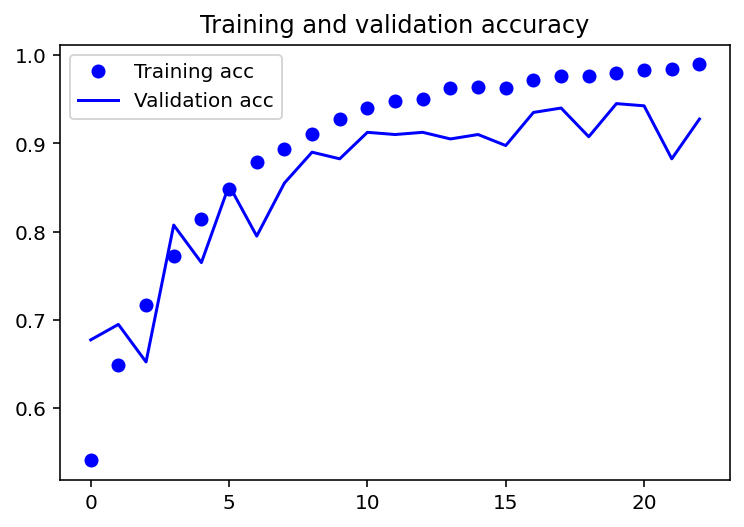

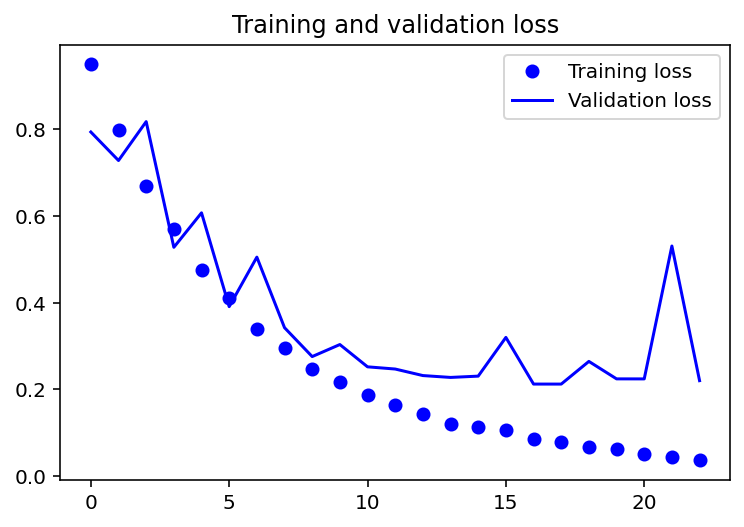

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator, steps=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

acc: 94.25%


### 데이터 보강 후 CNN1
- accuracy 94.25%

In [ ]:
img_size=256

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.2,zoom_range=0.2, horizontal_flip=True,)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_size, img_size),batch_size=20, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=(img_size, img_size),batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory( test_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')


history = model.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=50,
                              validation_data=valid_generator,
                              validation_steps=20, 
                              callbacks =[earlystopping])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
150/150 [==============================] - 59s 384ms/step - loss: 1.0195 - acc: 0.4711 - val_loss: 0.8878 - val_acc: 0.6325
Epoch 2/50
150/150 [==============================] - 57s 381ms/step - loss: 0.8737 - acc: 0.6148 - val_loss: 0.7550 - val_acc: 0.6625
Epoch 3/50
150/150 [==============================] - 57s 381ms/step - loss: 0.7612 - acc: 0.6710 - val_loss: 0.6107 - val_acc: 0.7775
Epoch 4/50
150/150 [==============================] - 57s 382ms/step - loss: 0.6642 - acc: 0.7220 - val_loss: 0.7665 - val_acc: 0.6775
Epoch 5/50
150/150 [==============================] - 57s 381ms/step - loss: 0.5964 - acc: 0.7627 - val_loss: 0.6281 - val_acc: 0.7100
Epoch 6/50
150/150 [==============================] - 57s 382ms/step - loss: 0.5333 - acc: 0.7967 - val_loss: 0.4922 - val_acc: 0.8050
Epoch 7/50
150/150 [==============================] - 57s 382ms/step - loss: 0.4817 - acc: 0.8211 - val_loss: 0.4227 - val_acc: 0.8225
Epoch 8/50
150/150 [==============================] - 5

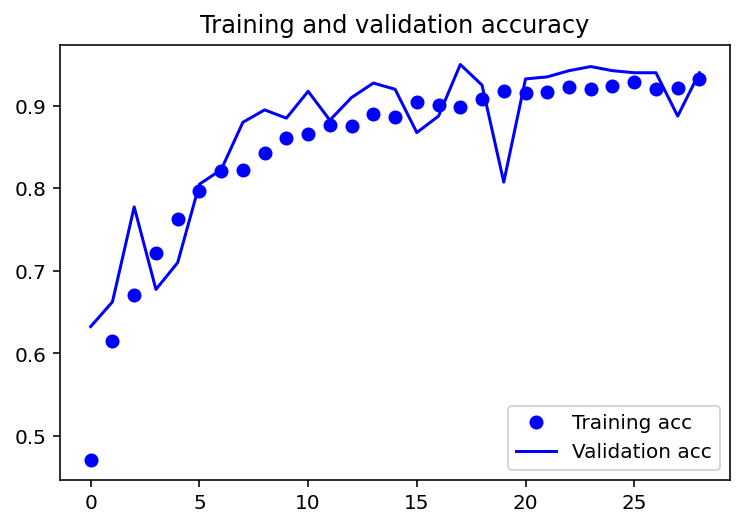

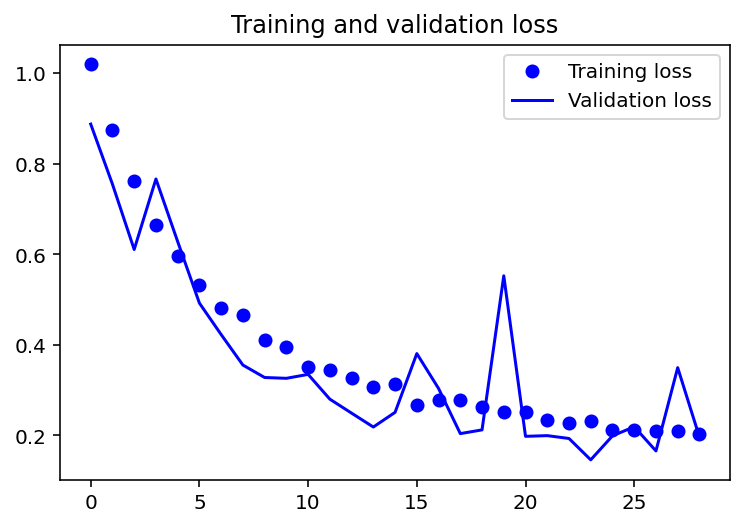

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator, steps=20)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


acc: 94.25%


### CNN2
- accuracy 91.50%

In [ ]:
model2 = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax'),
])
model2.build(input_shape=(img_size, img_size, 3)) 

model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
history = model2.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=50,
    validation_data=valid_generator,validation_steps=20, callbacks =[earlystopping])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/50
150/150 [==============================] - 17s 103ms/step - loss: 1.0361 - acc: 0.4417 - val_loss: 0.9398 - val_acc: 0.6100
Epoch 2/50
150/150 [==============================] - 15s 102ms/step - loss: 0.9243 - acc: 0.5814 - val_loss: 0.8690 - val_acc: 0.6275
Epoch 3/50
150/150 [==============================] - 15s 100ms/step - loss: 0.8724 - acc: 0.6142 - val_loss: 0.8127 - val_acc: 0.6550
Epoch 4/50
150/150 [==============================] - 15s 102ms/step - loss: 0.8320 - acc: 0.6356 - val_loss: 0.7546 - val_acc: 0.7075
Epoch 5/50
150/150 [==============================] - 15s 101ms/step - loss: 0.7589 - acc: 0.6693 - val_loss: 0.6938 - val_acc: 0.7150
Epoch 6/50
150/150 [==============================] - 15s 101ms/step - loss: 0.6789 - acc: 0.7222 - val_loss: 0.6034 - val_acc: 0.7650
Epoch 7/50
150/150 [==============================] - 15s 102ms/step - loss: 0.5901 - acc: 0.7586 - val_loss: 0.5271 - val_acc: 0.7950
Epoch 8/50
150/150 [==============================] - 1

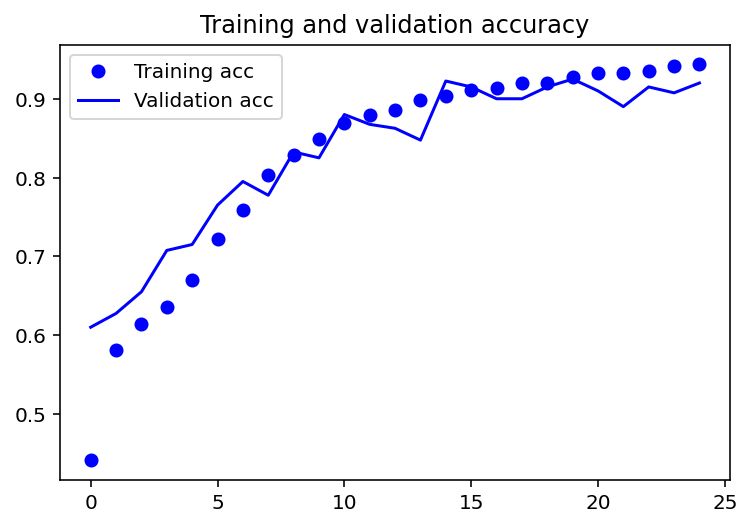

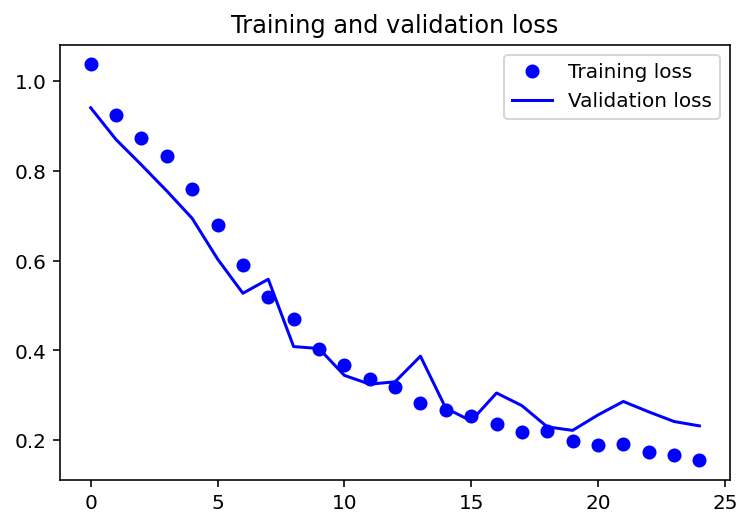

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
scores = model2.evaluate_generator(test_generator, steps=20)
print("%s: %.2f%%" %(model2.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


acc: 91.50%


### VGG16
- accuracy 98.25%

In [ ]:
from tensorflow.keras.applications import VGG16

img_size=256
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
conv_base.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
modelv = models.Sequential() 
modelv.add(conv_base) 
modelv.add(layers.Flatten())
modelv.add(layers.Dense(256, activation='relu')) 
modelv.add(layers.Dense(3, activation='sigmoid'))
modelv.summary()

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2, horizontal_flip=True,)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_size, img_size),batch_size=20, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=(img_size, img_size),batch_size=20, class_mode='categorical')
test_generator = test_datagen.flow_from_directory( test_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')

modelv.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = modelv.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=50,
                              validation_data=valid_generator,
                              validation_steps=20, 
                              callbacks =[earlystopping])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               8388864   
                                                                 
 dense_13 (Dense)            (None, 3)                 771       
                                                                 
Total params: 23,104,323
Trainable params: 23,104,323
Non-trainable params: 0
_________________________________________________________________
Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
150/150 [==============================] - 138s 835ms/step - loss: 1.1358 - acc: 0.3748 - val_loss: 1.0858 - val_acc: 0.3925
Epoch 2/50
150/150 [==============================] - 119s 793ms/step - loss: 1.0353 - acc: 0.4550 - val_loss: 0.7974 - val_acc: 0.6050
Epoch 3/50
150/150 [==============================] - 120s 798ms/step - loss: 0.7264 - acc: 0.6867 - val_loss: 0.5117 - val_acc: 0.8250
Epoch 4/50
150/150 [==============================] - 120s 795ms/step - loss: 0.3688 - acc: 0.8572 - val_loss: 0.3638 - val_acc: 0.8100
Epoch 5/50
150/150 [==============================] - 120s 794ms/step - loss: 0.3120 - acc: 0.9067 - val_loss: 0.1709 - val_acc: 0.9325
Epoch 6/50
150/150 [==============================] - 120s 795ms/step - loss: 0.2125 - acc: 0.9460 - val_loss: 0.0584 - val_acc: 0.9775
Epoch 7/50
150/150 [==============================] - 119s 793ms/step - loss: 0.2153 - acc: 0.9448 - val_loss: 0.0821 - val_acc: 0.9725
Epoch 8/50
150/150 [============================

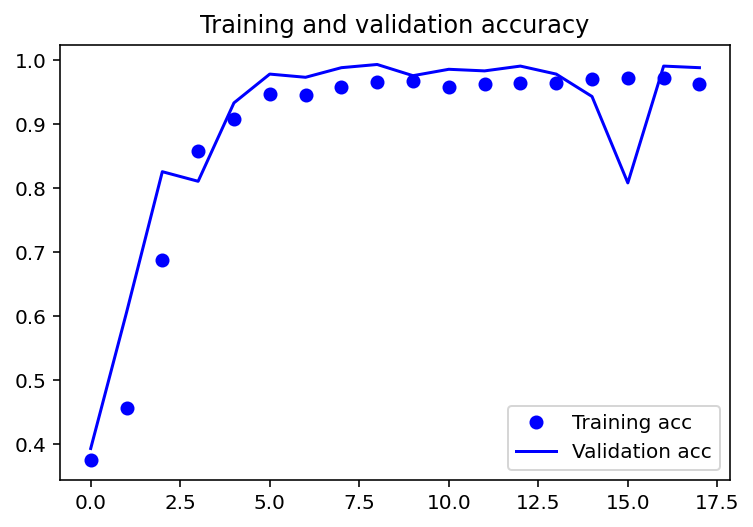

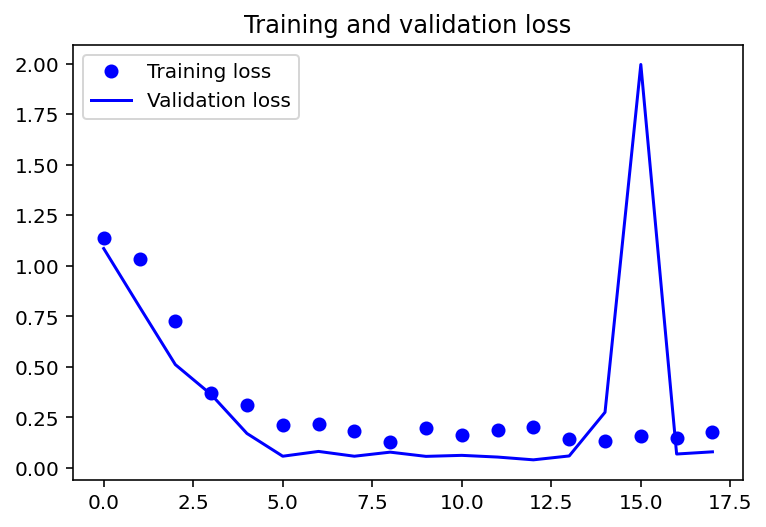

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
scores = modelv.evaluate_generator(test_generator, steps=20)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


acc: 98.25%
